### U-Net network architecture restricts the input size to a specific set of sizes, that could be derived from an algebraic formula.

At each level of the network - when we apply 2 times conv 3x3 we loose 4 pixels due to network padding, at every max pooling layer we halve the size of the previous layer output, at every up-convolution we double previous layer's output. This operations results in the input size constrain, that in this notebook is being addressed.

In the diagram below (source: https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/) the input size is equal to 572x572 the output size on the other hand is equal to 388x388, we lost on the way 184 pixels.

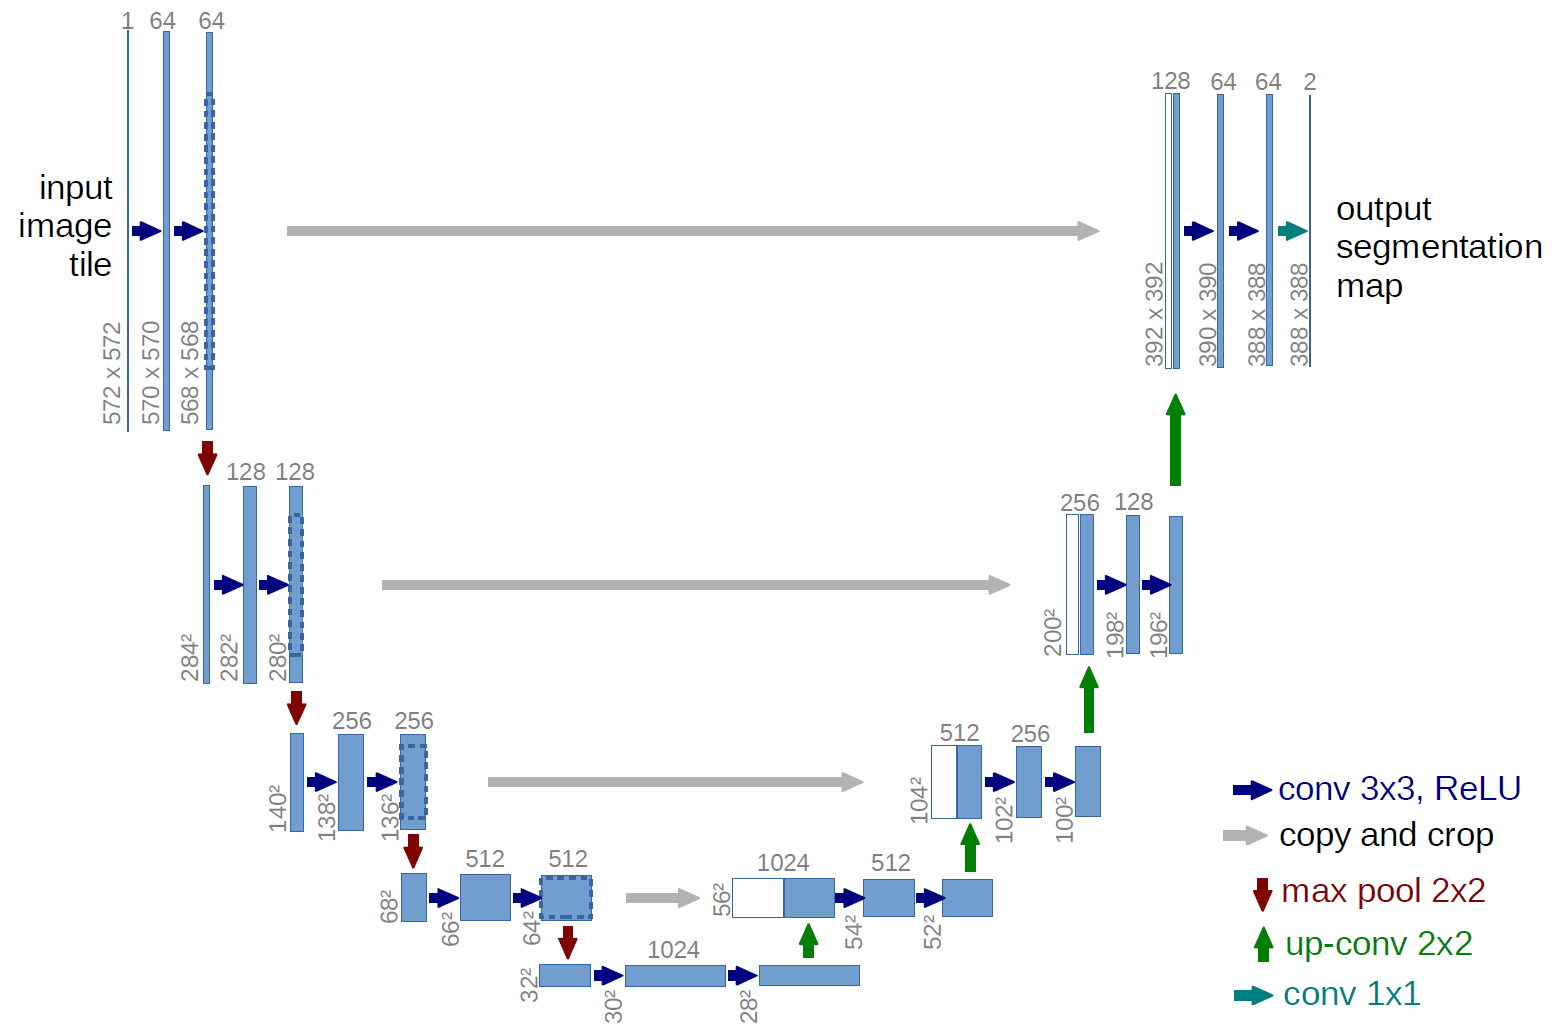

In [41]:
def cut_divide(x):
    return (x - 4)/2

def cut_multiply(x):
    return (x - 4)*2

def cut(x):
    return x-4

def calculate_unet_input_sizes(lower_bound, upper_bound):
    """This function finds all possible input sizes to the U-Net network 
    that won't cause the network to crush because of decimal rest from the division
    
    args:
    lower_bound - minimal input size that the image could be cropped to
    upper_bound - maximal input size that the image could be padded to
    
    return:
    tentative_sizes - list of possible sizes 
    
    (assuming network accept square-like images as in the original paper (572x572))
    """
    tentative_sizes = []
    for i in range(lower_bound, upper_bound):
        x1 = cut_divide(float(i))
        x2 = cut_divide(x1)
        x3 = cut_divide(x2)    
        x4 = cut_divide(x3)    
        x5 = cut_multiply(x4)
        x6 = cut_multiply(x5)
        x7 = cut_multiply(x6)
        x8 = cut_multiply(x7)
        x9 = cut(x8)
        
        if cut(float(i)).is_integer() and x1.is_integer() and cut(x1).is_integer() and x2.is_integer() and cut(x2).is_integer() and x3.is_integer() and cut(x3).is_integer() and x4.is_integer():
            if cut(x4).is_integer() and x5.is_integer() and cut(x5).is_integer() and x6.is_integer() and cut(x6).is_integer() and x7.is_integer() and cut(x7).is_integer() and x8.is_integer() and cut(x8).is_integer() and x9.is_integer():
                print(i)
                tentative_sizes.append(i)
    return tentative_sizes

In [43]:
sizes = calculate_unet_input_sizes(300,400)

300
316
332
348
364
380
396


                                                    Notes

------------------------------------------------------

#### When we look at the sizes of each layer after each operation applied to the image in the original article we can see that the sizes are all integers. Combining that with the information that network crushes for some sizes like (352,352) or (320,320), we can see that these sizes after application of the U-Net operations are not integers, this information will be used to find the potential candidates for the input sizes to the U-Net network.

In [44]:
x=572.0
x1 = cut_devide(x)
print(cut(x), x1)
x2 = cut_devide(x1)
print(cut(x1), x2)
x3 = cut_devide(x2)
print(cut(x2), x3)
x4 = cut_devide(x3)
print(cut(x3), x4)

568.0 284.0
280.0 140.0
136.0 68.0
64.0 32.0


In [45]:
x5 = cut_multiply(x4)
print(cut(x4), x5)
x6 = cut_multiply(x5)
print(cut(x5), x6)
x7 = cut_multiply(x6)
print(cut(x6), x7)
x8 = cut_multiply(x7)
print(cut(x7), x8)
x9 = cut(x8)
print(cut(x8), x9)

28.0 56.0
52.0 104.0
100.0 200.0
196.0 392.0
388.0 388.0
